In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import time

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
pwd

'C:\\Users\\91982'

In [4]:
import os

In [5]:
os.chdir(r"C:\Users\91982\Downloads")

In [6]:
data=pd.read_csv(r"hotel_bookings.csv")

In [7]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
data.shape

(119390, 32)

In [10]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [11]:
nan_replacements={
    'country':'unknown',
    'children':0,
    'agent':0,
    'company':0,
}

In [12]:
new_data=data.fillna(nan_replacements)

In [13]:
new_data['meal'].replace('Undefined','SC',inplace=True)

In [14]:
zero_guests=list(new_data.loc[new_data['adults'] + new_data['children'] + new_data['babies']==0].index)

In [15]:
print(len(zero_guests))

180


In [16]:
new_data.drop(new_data.index[zero_guests],inplace=True)

In [17]:
new_data.shape

(119210, 32)

In [18]:
new_data['hotel'].value_counts()

City Hotel      79163
Resort Hotel    40047
Name: hotel, dtype: int64

In [19]:
values=list(new_data['hotel'].value_counts())
values
lab=["City Hotel","Resort Hotel"]

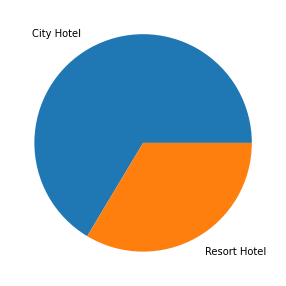

In [20]:
plt.rcParams["figure.figsize"] = (20,5)
plt.pie(values,labels=lab,labeldistance=1.15);
plt.show();

Thus 66.41% of the people in data have booked City Hotel.
And 33.59% of the people in data have booked Resort Hotel.

Now let's divide our data into two different dataframes:- city hotel bookings(ch) and resort hotel bookings(rh).

In [21]:
rh=new_data.loc[(new_data['hotel']=='Resort Hotel') & (new_data['is_canceled']==0)]
ch=new_data.loc[(new_data['hotel']=='City Hotel') & (new_data['is_canceled']==0)]

In [22]:
rh.shape

(28927, 32)

In [23]:
ch.shape

(46084, 32)

# 1)Which Month has highest bookings?

In [24]:
sns.set(rc={'figure.figsize':(12.5,8.5)})

<AxesSubplot:xlabel='arrival_date_month', ylabel='count'>

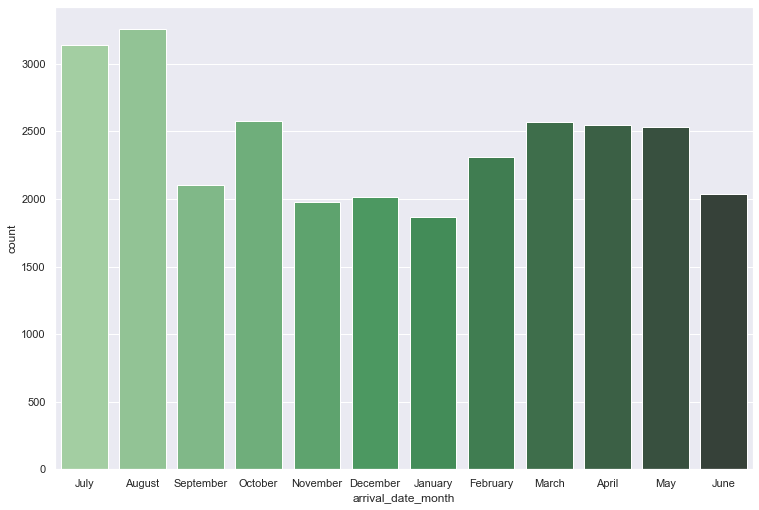

In [25]:
sns.countplot(x='arrival_date_month',data=rh,palette='Greens_d')

Resort Hotels have higher number of guests in the month of August and July, more than 3000 from overall data.
March,April,May and October has guests more than 2500 each from overall data.
Thus, Resort Hotels are busiest in Summer and busier in Spring and Autumn(mostly October).

<AxesSubplot:xlabel='arrival_date_month', ylabel='count'>

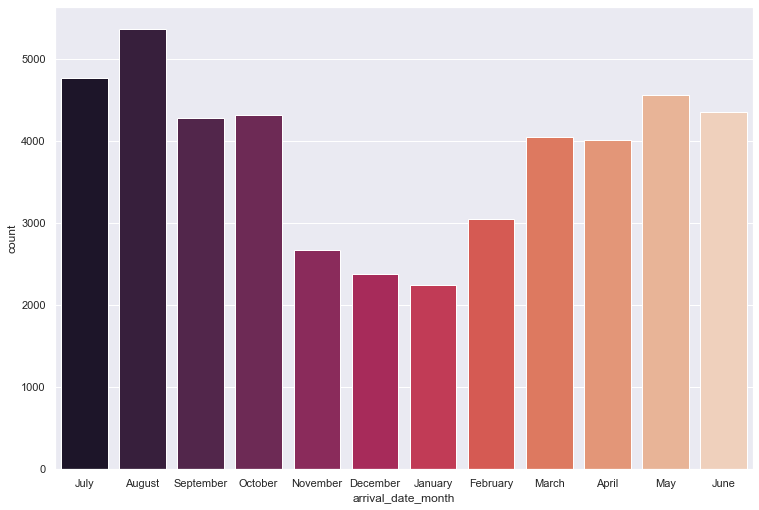

In [26]:
sns.countplot(x='arrival_date_month',data=ch,palette='rocket')

City Hotels have higher number of guests in the month of August and July, more than 4500 guests from overall data.
Then comes the months - March, April, May, June, September and October having guests more than 4000 each from the overall data.
Thus, City Hotels are busiest around Summer and busier in Spring and Autumn.

# 2) WHICH ARE MORE DEMANDING - WEEKENDS OR WEEKDAYS?

In [27]:
new_data[new_data['is_canceled']==0].shape

(75011, 32)

In [54]:
not_canceled=pd.DataFrame(new_data[new_data['is_canceled']==0])
not_canceled.shape

(75011, 33)

In [28]:
new_data[(new_data['stays_in_weekend_nights']==0) & (new_data['stays_in_week_nights']!=0) & (new_data['is_canceled']==0)].shape

(31788, 32)

In [29]:
new_data[(new_data['stays_in_weekend_nights']!=0) & (new_data['stays_in_week_nights']==0) & (new_data['is_canceled']==0)].shape

(5050, 32)

In [30]:
new_data[(new_data['stays_in_weekend_nights']==0) & (new_data['stays_in_week_nights']==0) & (new_data['is_canceled']==0)].shape

(622, 32)

So 42.38% of bookings (which were not canceled) are for weekday nights only.
And 6.73% of bookings (which were not canceled) are for weekend nights only.

Thus there are much less number of bookings for only weekend nights.
Either people book a room for weekend and weekday nights(50.06 %) or just weekday nights.

In [31]:
rh[(rh['stays_in_weekend_nights']==0) & (rh['stays_in_week_nights']!=0)].shape

(10562, 32)

In [32]:
ch[(ch['stays_in_weekend_nights']==0) & (ch['stays_in_week_nights']!=0)].shape

(21226, 32)

rh has 28,927 bookings and ch has 46,084 bookings.

6.49 % of Resort Hotel bookings are for only weekend nights.
6.89 % of City Hotel bookings are for only weekend nights.

36.51% of Resort Hotel bookings are for only weekday nights.
46.06% of City Hotel bookings are for only weekday nights.

# 3) Maximum Bookings are from which country?

TOP 10 COUNTRY BOOKINGS:

Text(0.5, 0, 'Country')

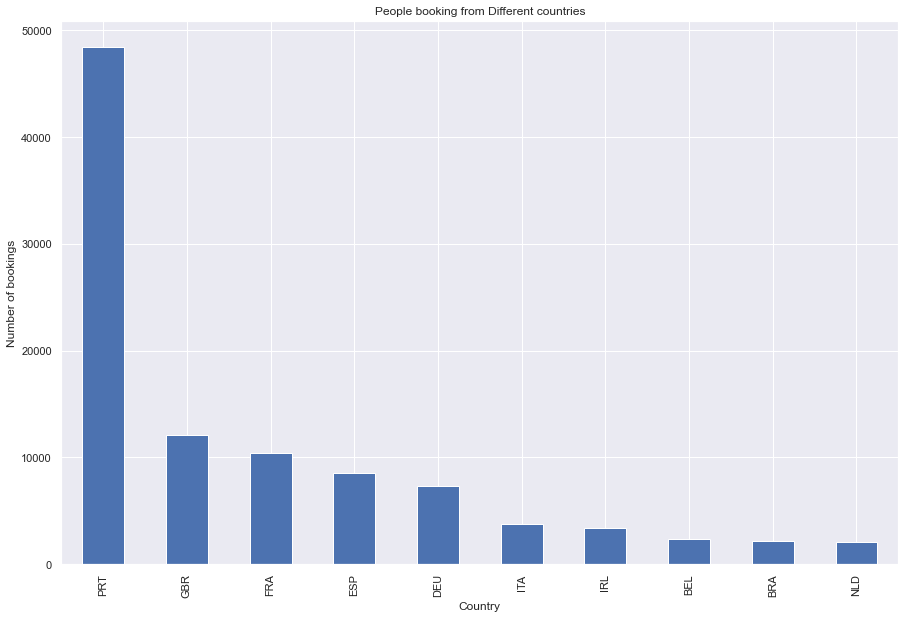

In [33]:
new_data.country.value_counts().nlargest(10).plot(kind='bar', figsize=(15,10))
plt.title("People booking from Different countries")
plt.ylabel('Number of bookings')
plt.xlabel('Country')

In [38]:
topten=pd.DataFrame(new_data.country.value_counts().nlargest(10),columns=['country'])
topten

,country
PRT,48483
GBR,12120
FRA,10401
ESP,8560
DEU,7285
ITA,3761
IRL,3374
BEL,2342
BRA,2222
NLD,2103


In [56]:
newtopten=pd.DataFrame(not_canceled.country.value_counts().nlargest(10),columns=['country'])
newtopten

,country
PRT,20977
GBR,9668
FRA,8468
ESP,6383
DEU,6067
IRL,2542
ITA,2428
BEL,1868
NLD,1716
USA,1592


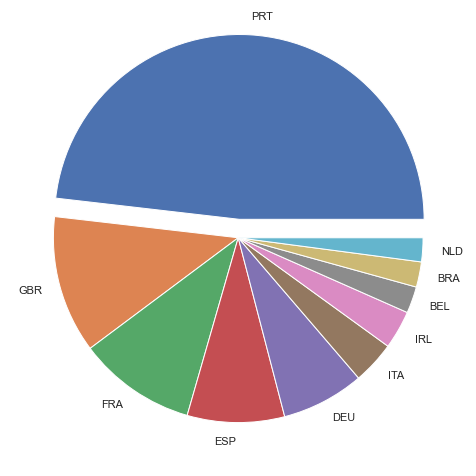

In [61]:
y = topten['country']
mylabels = ['PRT','GBR','FRA','ESP','DEU','ITA','IRL','BEL','BRA','NLD']
myexplode = [0.1, 0, 0, 0,0,0,0,0,0,0]

plt.pie(y, labels = mylabels, explode = myexplode)
plt.show() 

In [47]:
new_data[(new_data['country']=='PRT') & (new_data['is_canceled']==1)].shape

(27506, 32)

Portugal bookings were 48,483 in the total data.
Out of which, 10,184 were booked in Resort Hotel and 10,793 were booked in City Hotel.
And 27,506 bookings were canceled.
Therefore, 56.73 % of the bookings were canceled.

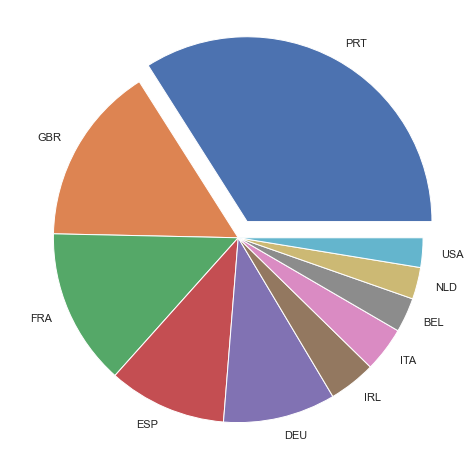

In [62]:
y = newtopten['country']
mylabels = ['PRT','GBR','FRA','ESP','DEU','IRL','ITA','BEL','NLD','USA']
myexplode = [0.1, 0, 0, 0,0,0,0,0,0,0]

plt.pie(y, labels = mylabels, explode = myexplode)
plt.show() 

After using data of bookings which were not canceled, Portugal has still highest number of bookings.

# 4) How many number of guests book rooms?

In [64]:
total_guests=list(new_data.loc[(new_data['adults']) + (new_data['children']) + (new_data['babies'])].index)

In [65]:
new_data['totalguests'] = total_guests

Text(0.5, 0, 'value count')

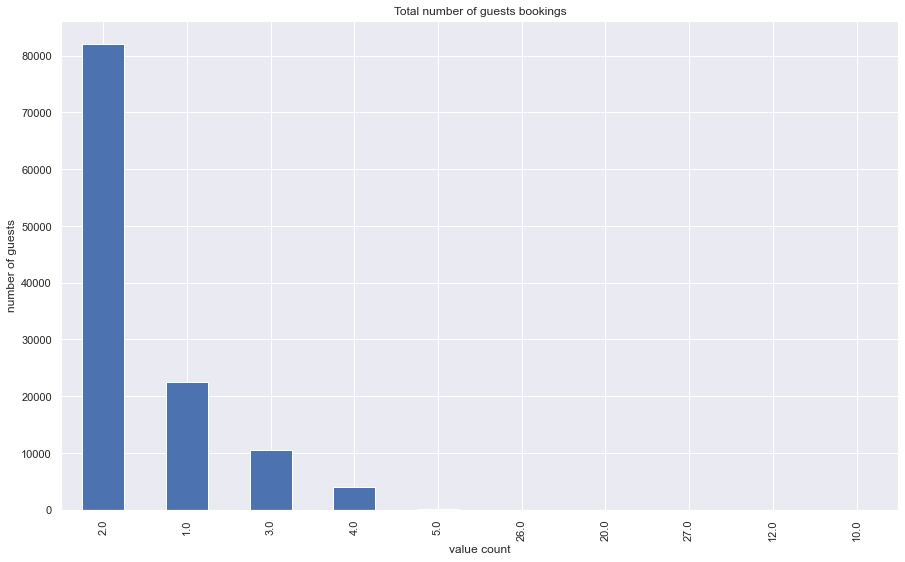

In [72]:
new_data.totalguests.value_counts().nlargest(10).plot(kind='bar', figsize=(15,9))
plt.title("Total number of guests bookings")
plt.ylabel('number of guests')
plt.xlabel('value count')

# 5) Which country bookings are the repeated guests?

In [73]:
repeated=pd.DataFrame(new_data['country'].loc[(new_data['is_repeated_guest']==1) & (new_data['is_canceled']==0)])

In [74]:
repval=list(repeated.value_counts())

Text(0.5, 0, 'value count')

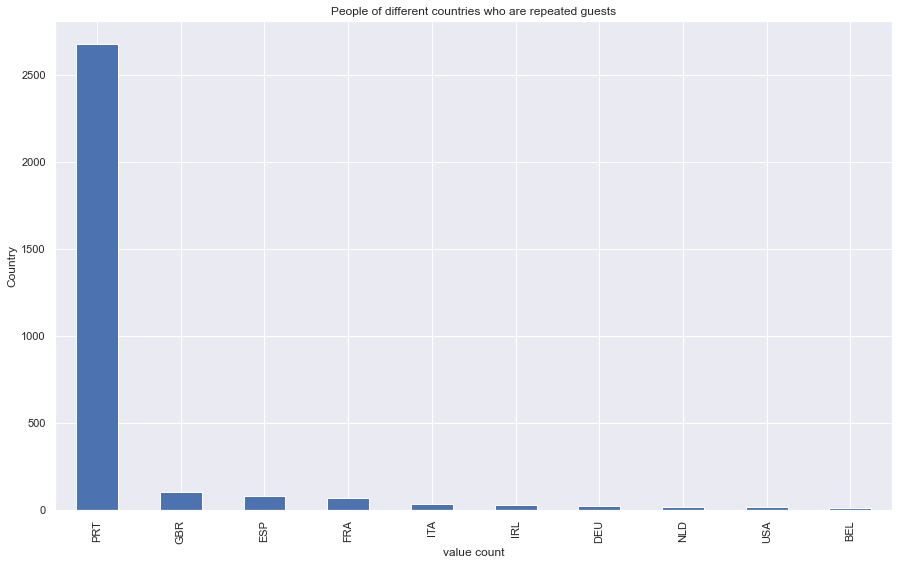

In [75]:
repeated.country.value_counts().nlargest(10).plot(kind='bar', figsize=(15,9))
plt.title("People of different countries who are repeated guests")
plt.ylabel('Country')
plt.xlabel('value count')

Portugal with 2677 Repeated guests has maximum bookings.

# 6) Which Room Type does people book?

In [76]:
new_data['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'B'], dtype=object)

SO there are 9 room types.
A,B,C,D,E,F,G,H and L.

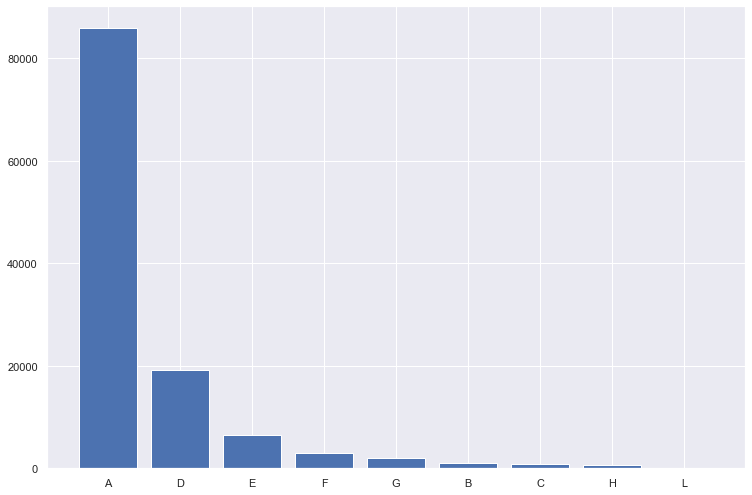

In [88]:
counts = new_data["reserved_room_type"].value_counts()
plt.bar(counts.index, counts.values)
plt.show()

Room type A has been booked the most.

# 7) Which Agent made bookings the most?

In [105]:
agents=pd.DataFrame(new_data[new_data['agent']!=0.0])
agents

agentss=pd.DataFrame(agents['agent'].value_counts().nlargest(10))
agentss

,agent
9.0,31922
240.0,13922
1.0,7187
14.0,3633
7.0,3532
6.0,3290
250.0,2870
241.0,1721
28.0,1657
8.0,1514


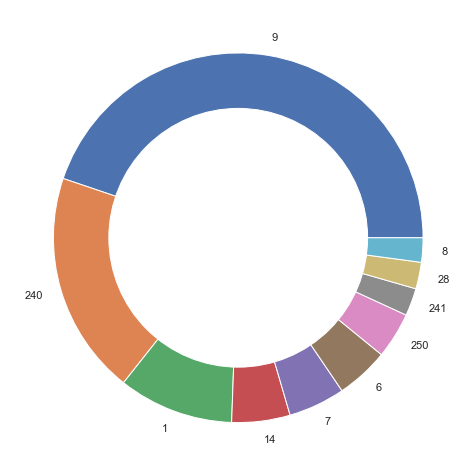

In [106]:
names = [9,240,1,14,7,6,250,241,28,8]
size = agentss['agent']
my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names)
p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the graph
plt.show()

MAX Bookings = 31,922 bookings were by agent 9.0

# 8) Which company had highest bookings?

In [107]:
companies=pd.DataFrame(new_data[new_data['company']!=0])

In [111]:
comp=pd.DataFrame(companies['company'].value_counts().nlargest(10))
comp

,company
40.0,924
223.0,784
67.0,267
45.0,249
153.0,213
174.0,147
219.0,141
281.0,138
154.0,133
405.0,119


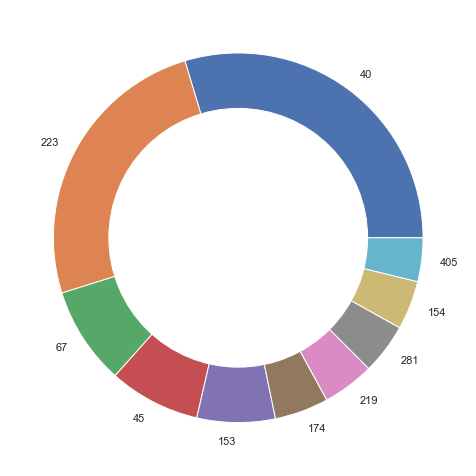

In [112]:
names = [40,223,67,45,153,174,219,281,154,405]
size = comp['company']
my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names)
p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the graph
plt.show()

MAX Bookings = 924 by Company 40.0

# 9) How much Car Parking Space Is Enough?

In [115]:
new_data[new_data.required_car_parking_spaces!=0].required_car_parking_spaces.value_counts()

1    7376
2      28
3       3
8       2
Name: required_car_parking_spaces, dtype: int64

In [125]:
parking1=new_data[['required_car_parking_spaces','arrival_date_day_of_month','arrival_date_month']]
totalparking1= parking1.groupby(['arrival_date_day_of_month','arrival_date_month']).sum()
print(totalparking1)

                                              required_car_parking_spaces
arrival_date_day_of_month arrival_date_month                             
1                         April                                        19
                          August                                       50
                          December                                     20
                          February                                      8
                          January                                       9
...                                                                   ...
31                        January                                       7
                          July                                         33
                          March                                        25
                          May                                          19
                          October                                      29

[366 rows x 1 columns]


In [126]:
totalparking1.max()

required_car_parking_spaces    50
dtype: int64

50 parking spaces are required the most. 

# 10) What is the Average Cost Per Person in Resort Hotel?

In [127]:
rh['adr_pp']=rh['adr']/(rh['adults'] + rh['children'])

In [130]:
print("""The average price of room per night and person,
      regardless of room type and meal, in a resort hotel is: {:.2f} EUR"""
      .format(rh['adr_pp'].mean()))

The average price of room per night and person,
      regardless of room type and meal, in a resort hotel is: 47.49 EUR


# 11) What is the Average Cost Per Person in City Hotel?

In [131]:
ch['adr_pp']=ch['adr']/(ch['adults'] + ch['children'])

In [132]:
print("""The average price of room per night and person,
      regardless of room type and meal, in a city hotel is: {:.2f} EUR"""
      .format(ch['adr_pp'].mean()))

The average price of room per night and person,
      regardless of room type and meal, in a city hotel is: 59.27 EUR


# 12) Which Month Has Highest Average Cost?

In [138]:
adr_pp=list(new_data['adr']/(new_data['adults'] + new_data['children']))
new_data['adr_pp']=adr_pp

In [143]:
monpri=new_data[['adr_pp','arrival_date_month']]
monthlyprice=monpri.groupby('arrival_date_month').mean()
print(monthlyprice)

                       adr_pp
arrival_date_month           
April               53.543623
August              65.960983
December            44.185154
February            41.956388
January             43.485103
July                61.041555
June                64.502485
March               45.963692
May                 62.346745
November            47.146727
October             51.326342
September           58.917502


May,June,July and August have high avg cost throughout the year, especially August.

# 13) What are the length of stays?

In [157]:
staylength=list(new_data.loc[(new_data['stays_in_weekend_nights']) + (new_data['stays_in_week_nights'])].index)

In [148]:
new_data['staylength']=staylength

Text(0, 0.5, 'value count')

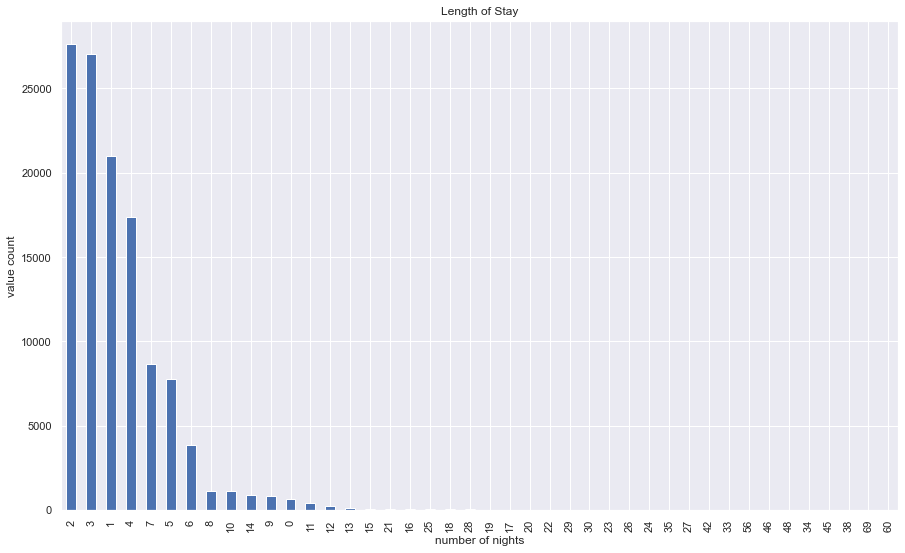

In [151]:
new_data.staylength.value_counts().plot(kind='bar', figsize=(15,9))
plt.title("Length of Stay")
plt.xlabel('number of nights')
plt.ylabel('value count')

# 14) Bookings by Market Segment:

In [159]:
new_data['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [161]:
market=pd.DataFrame(new_data['market_segment'].value_counts())

In [162]:
market

,market_segment
Online TA,56408
Offline TA/TO,24182
Groups,19791
Direct,12582
Corporate,5282
Complementary,728
Aviation,235
Undefined,2


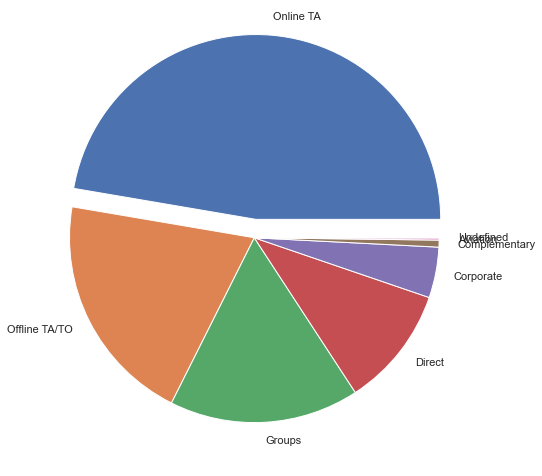

In [174]:
y = market['market_segment']
mylabels = ['Online TA','Offline TA/TO','Groups','Direct','Corporate','Complementary','Aviation','Undefined']
myexplode = [0.1, 0, 0, 0,0,0,0,0]

plt.pie(y, labels = mylabels, explode = myexplode)
plt.show() 